In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import networkx as nx
from tqdm.notebook import tqdm

class Graph(object):
    def __init__(self, Matrix, add_edge=None):
        self.Matrix = Matrix
        self.nodenum = len(self.Matrix)
        self.edgenum = self.get_edgenum()
        self._weight_ = np.zeros((self.nodenum, self.nodenum))
        self.add_edge = add_edge

    def get_edgenum(self):
        count = 0
        for i in range(self.nodenum):
            for j in range(i):
                if self.Matrix[i][j] > 0 and self.Matrix[i][j] < 9999:
                    count += 1
        return count

    def plot_matrix(self, pos=None, figsize=(15,15), title="Pipeline ONE"):
        plt.figure(figsize=(12,9)) 
        self._get_edge()
        G_nx = nx.Graph()
        G_nx2 = nx.Graph()
        if self.add_edge!=None:
          for i in range(self.nodenum):
              for j in range(self.nodenum):
                  if self._weight_[i, j]!=0 and i<13 and j<13:
                    G_nx.add_edge(i, j)
                  if self._weight_[i, j]!=0 and i>0 and j>0:
                    G_nx2.add_edge(i, j)
        else:
          for i in range(self.nodenum):
              for j in range(self.nodenum):
                  if self._weight_[i, j]!= 0:
                    G_nx.add_edge(i, j)
        if self.add_edge!=None:
          nx.draw_networkx(G_nx, pos[:len(self.add_edge)+1], alpha=0.85)
          nx.draw_networkx(G_nx2,pos,alpha=0.6,with_labels=False,node_color='slateblue',
              node_shape=".", node_size=100, style='dashed')
        else:
          nx.draw_networkx(G_nx, pos, alpha=0.85)
        GG = nx.Graph()
        GG.add_node(0)
        nx.draw_networkx(GG, {0:pos[0]}, node_color='r',node_shape='*', node_size=1200)
        plt.title(title)
        plt.show() # display
    
    def _get_edge(self):
      edge = self.prim()
      for k in edge:
        self._weight_[k[0],k[1]] = self.Matrix[k[0],k[1]]
      return self._weight_

    def prim(self, first_node = 0):
        # 存储已选顶点，初始化时可随机选择一个起点
        select = [first_node]
        # 存储未选顶点
        candidate = list(range(0, self.nodenum))
        candidate.remove(first_node)
        if self.add_edge!=None:
          node = []
          for i in self.add_edge:
            if i[0] not in node:
              node.append(i[0])
            if i[1] not in node:
              node.append(i[1]) 
          for i in node:
            select.append(i)
            if i in candidate:
              candidate.remove(i)
        # 存储每次搜索到的最小生成树的边
        edge = []+self.add_edge if self.add_edge!=None else []

        def min_edge(select, candidate, graph):
            min_weight = np.inf
            v, u = 0, 0
            for i in select:
                for j in candidate:
                    if min_weight > graph[i][j]:
                        min_weight = graph[i][j]
                        v, u = i, j
            return v, u

        num = len(self.add_edge)+1 if self.add_edge!=None else 1
        for i in range(num, self.nodenum):
            v, u = min_edge(select, candidate, self.Matrix)
            edge.append([v, u])
            select.append(u)
            candidate.remove(u)
        return edge

In [2]:
def distance(x1,y1,x2,y2):
  return np.sqrt((x1-x2)**2+(y1-y2)**2)

def fix(x):
  if x.startswith('A'):
    return 0
  return 1 if x.startswith('V') else 2

def get_xy(i,j=0):
  pos = []   # 元组中的两个数字是第i（从0开始计数）个点的坐标
  for k in range(j, i):
    pos.append((data['X坐标'].loc[k], data['Y坐标'].loc[k]))
  return pos

In [3]:
weight_array = np.zeros((181,181))
data = pd.read_excel('/content/drive/My Drive/competitions/CMCM/demo1/data.xlsx')
data['类型'] = data['类型'].apply(lambda x:fix(x))

# 初始化权重矩阵
for i in tqdm(range(181)):
  for j in range(181):
    point_i = data[data['序号']==i]
    point_j = data[data['序号']==j]
    weight_array[i][j] = distance(point_i['X坐标'].values,
                    point_i['Y坐标'].values,
                    point_j['X坐标'].values,
                    point_j['Y坐标'].values)
    if (i==0 and j>12) or (j==0 and i>12):
      weight_array[i][j]=0
weight_array[weight_array==0] = 10000

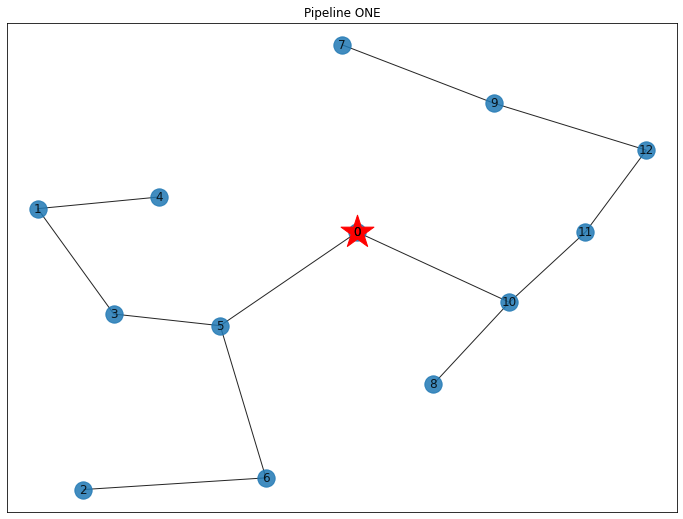

In [4]:
weight_array_A = weight_array[:13,:13]
G_A = Graph(weight_array_A)
pos_A = get_xy(G_A.nodenum)
edge_A = G_A.prim(first_node=0)
G_A.plot_matrix(pos_A)

节点数据为181，边数为16122



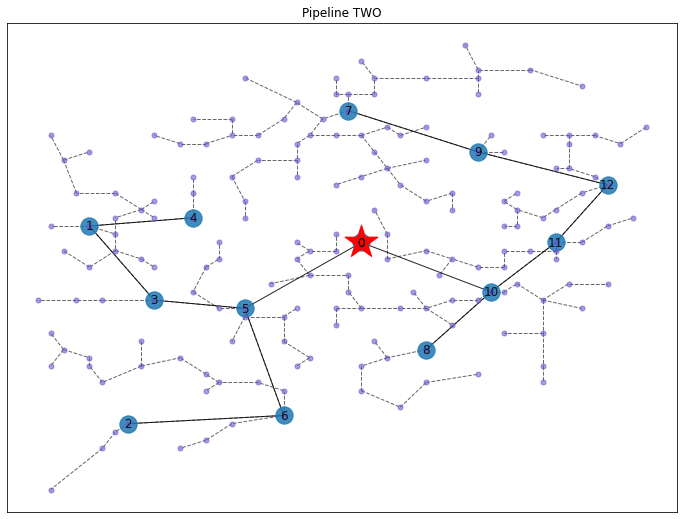

In [5]:
G = Graph(weight_array, edge_A)
print('节点数据为%d，边数为%d\n'%(G.nodenum, G.edgenum))
pos = get_xy(G.nodenum)
edge = G.prim()
G.plot_matrix(pos, title="Pipeline TWO")

In [6]:
sum = 0
for p in edge:
  i,j=p[0],p[1]
  sum = sum+weight_array[i][j]
sum

524.3458156290326

In [7]:
_max = (0,0,0)
_max2 = (0,0,0)
for ed in edge:
  i,j = ed[0],ed[1]
  if _max[0] < weight_array[i][j] and not (i<13 and j<13):
    _max = (weight_array[i][j], i, j)
for ed in edge:
  i,j = ed[0],ed[1]
  if i!=126 and j!=125:
    if _max2[0] < weight_array[i][j] and not (i<13 and j<13):
      _max2 = (weight_array[i][j], i, j)
  
_max, _max2

((6.4031242374328485, 126, 125), (5.0, 88, 89))

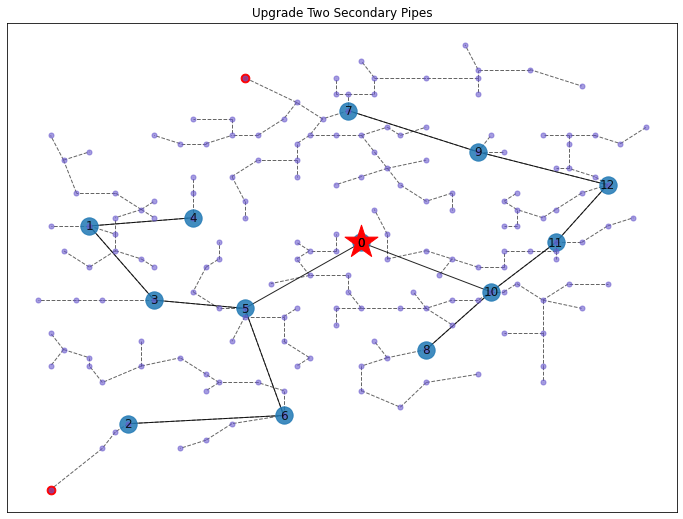

In [16]:
_weight_ = G._get_edge()
plt.figure(figsize=(12,9)) 
G_nx = nx.Graph()
G_nx2 = nx.Graph()
G_nx3 = nx.Graph()
G_nx4 = nx.Graph()
GG = nx.Graph()
for i in range(G.nodenum):
    for j in range(G.nodenum):
        if _weight_[i, j]!=0 and i<13 and j<13:
          G_nx.add_edge(i, j)
        if _weight_[i, j]!=0 and i>0 and j>0:
          G_nx2.add_edge(i, j)
# G_nx3.add_edge(126, 125)
# G_nx4.add_edge(88, 89)
G_nx3.add_node(125)
G_nx4.add_node(89)

nx.draw_networkx(G_nx3, {125:pos[125],},node_color='r',
      node_size=300, node_shape='.',with_labels=False, style='dashed')
nx.draw_networkx(G_nx4, {89:pos[89],},node_color='r',
      node_size=300, node_shape='.',with_labels=False, style='dashed')

nx.draw_networkx(G_nx, pos[:len(G.add_edge)+1], alpha=0.85)
nx.draw_networkx(G_nx2,pos,alpha=0.6,with_labels=False,node_color='slateblue',
    node_shape=".", node_size=100, style='dashed')
GG = nx.Graph()
GG.add_node(0)
nx.draw_networkx(GG, {0:pos[0]}, node_color='r',node_shape='*', node_size=1200)

plt.title("Upgrade Two Secondary Pipes")
plt.show() 